In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("insurance.csv")
df.shape

(1338, 7)

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


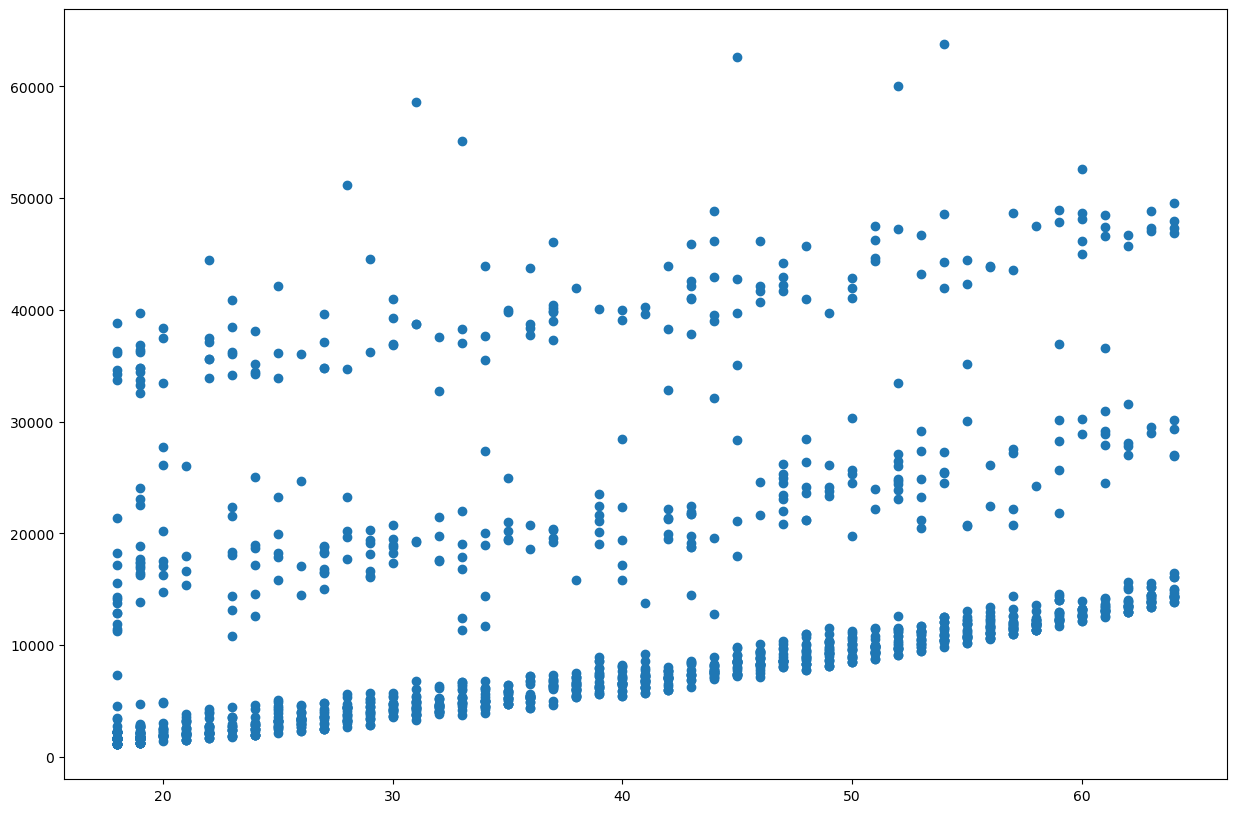

In [8]:
plt.figure(figsize=(15, 10))
plt.scatter(df['age'], df['charges'])

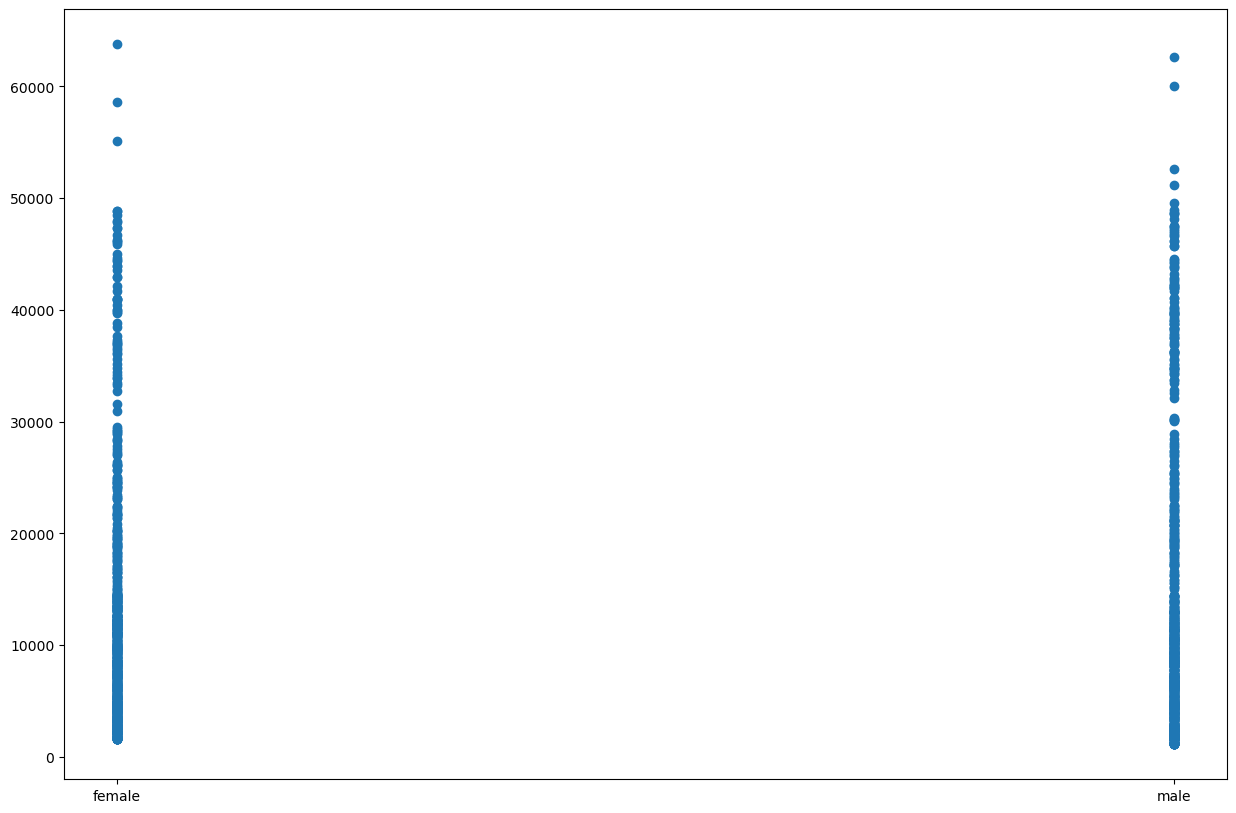

In [9]:
plt.figure(figsize=(15, 10))
plt.scatter(df['sex'], df['charges'])

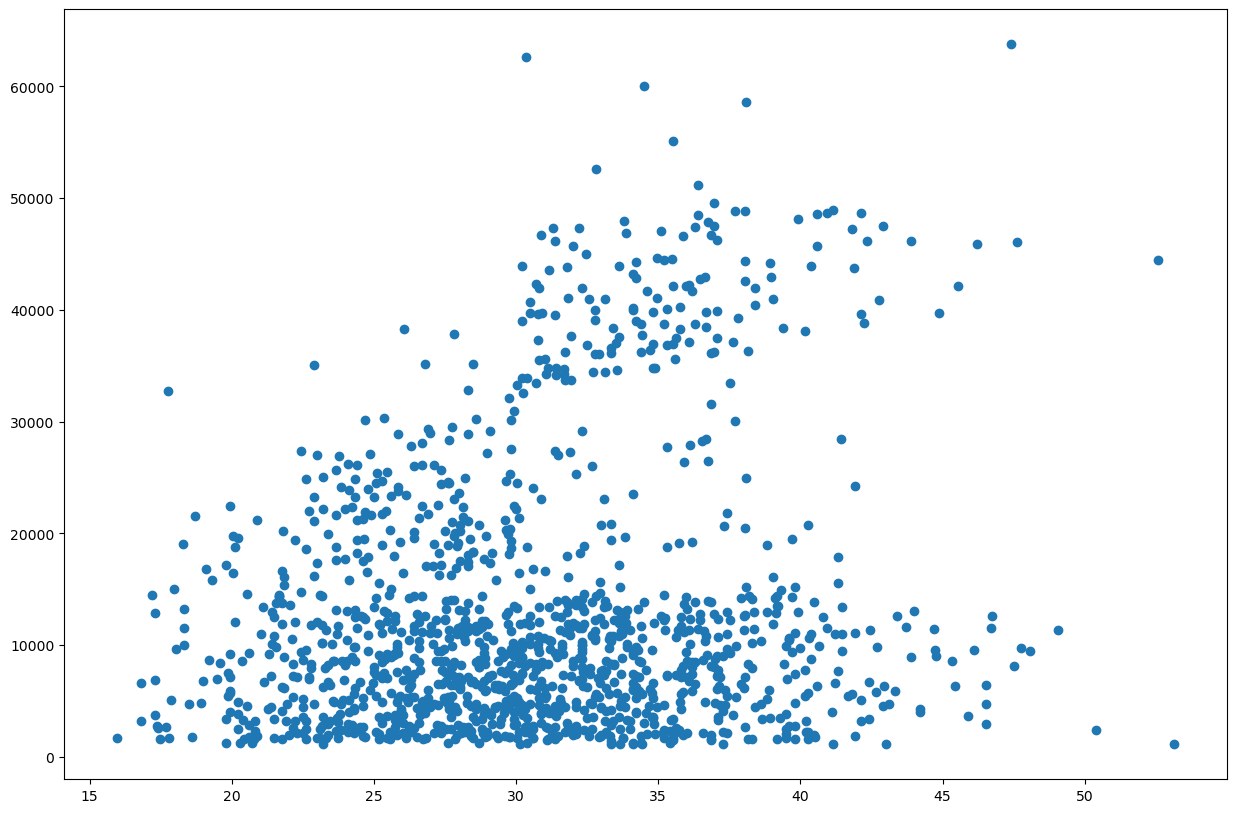

In [10]:
plt.figure(figsize=(15, 10))
plt.scatter(df['bmi'], df['charges'])

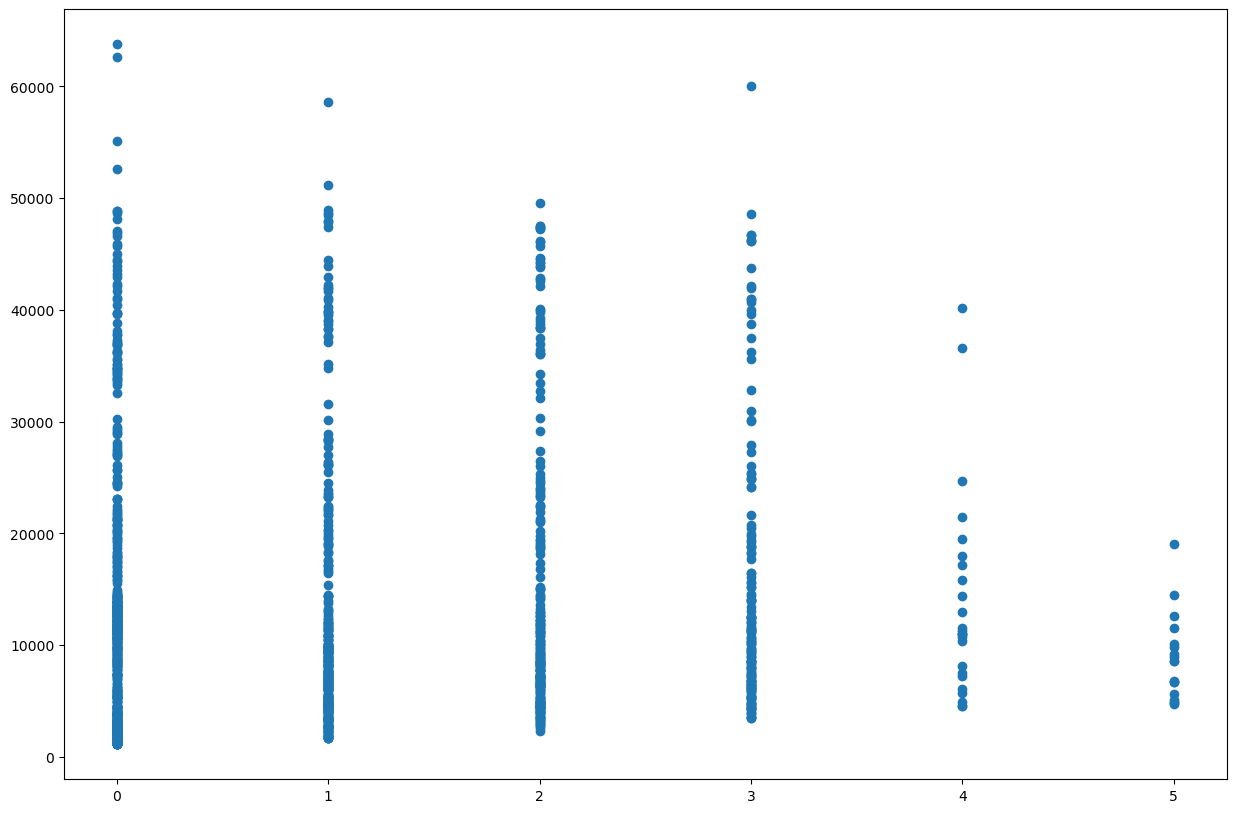

In [11]:
plt.figure(figsize=(15, 10))
plt.scatter(df['children'], df['charges'])

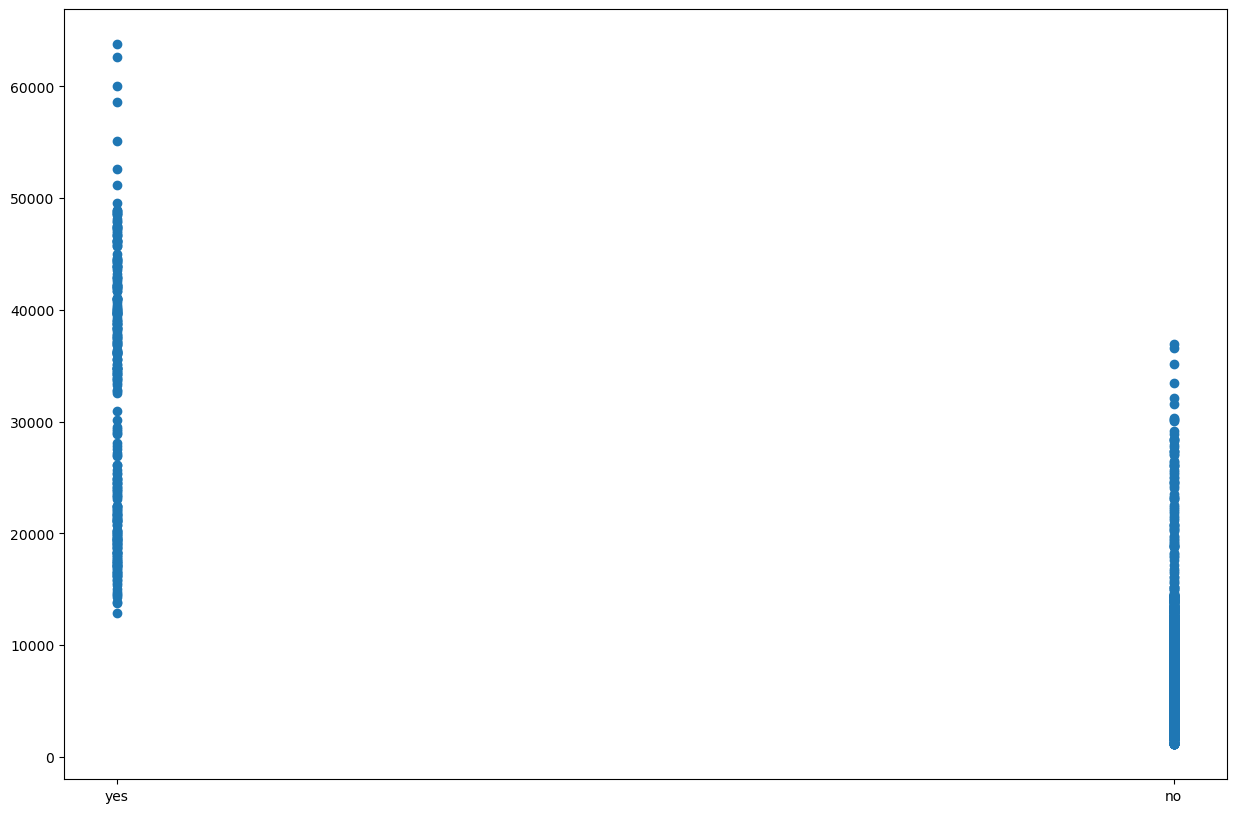

In [12]:
plt.figure(figsize=(15, 10))
plt.scatter(df['smoker'], df['charges'])

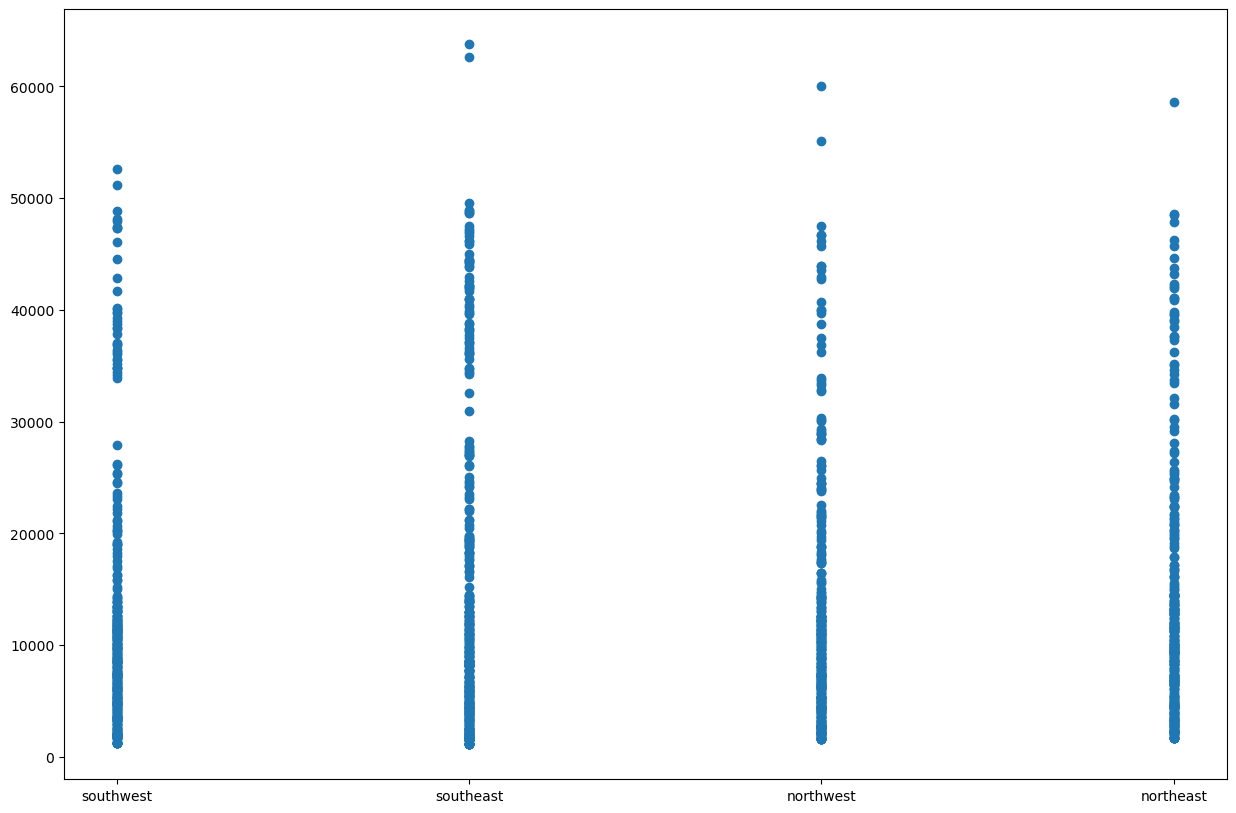

In [13]:
plt.figure(figsize=(15, 10))
plt.scatter(df['region'], df['charges'])

In [14]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
df['sex'] = df['sex'].map({'male': 0, 'female':1})


In [16]:
df['sex'].value_counts()

0    676
1    662
Name: sex, dtype: int64

In [17]:
df.smoker = df.smoker.map({"no": 0, "yes": 1})

In [18]:
np.unique(df.region)

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [19]:
regions = df.region

In [20]:
region_columns = pd.get_dummies(regions)

In [21]:
df.drop(['region'], axis=1, inplace=True)

In [22]:
df = pd.concat([df, region_columns], axis=1)

In [23]:
df.shape

(1338, 10)

In [24]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


<AxesSubplot:>

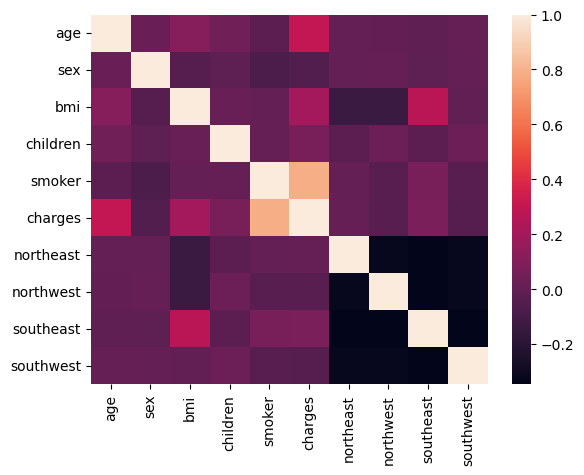

In [25]:
corr = df.corr()
sns.heatmap(corr)

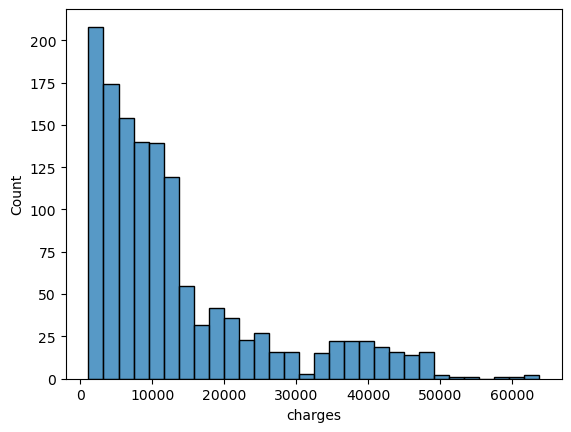

In [26]:
sns.histplot(df['charges']);

c:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


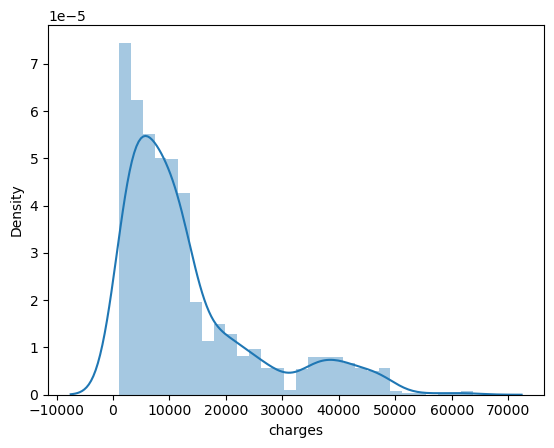

In [27]:
sns.distplot(df['charges']);

In [28]:
x = df.drop(['charges'], axis=1)
x.shape

(1338, 9)

In [29]:
y = df['charges']
y.shape

(1338,)

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1204, 9), (134, 9), (1204,), (134,))

# Decision Tree

In [31]:
dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [32]:
dt.score(xtrain, ytrain)

0.9985281581538541

In [33]:
dt.score(xtest, ytest)

0.6828533683295561

In [34]:
dt_y_trainpred = dt.predict(xtrain)

In [35]:
dt_ypred = dt.predict(xtest)

In [36]:
mean_squared_error(ytrain, dt_y_trainpred)

217056.7468348033

In [37]:
mean_squared_error(ytest, dt_ypred)

43752058.36949688

In [38]:
r2_score(ytrain, dt_y_trainpred)

0.9985281581538541

In [39]:
r2_score(ytest, dt_ypred)

0.6828533683295561

In [64]:
dt.feature_importances_

array([0.12550521, 0.0074846 , 0.20579975, 0.02187859, 0.61868525,
       0.0043928 , 0.00757961, 0.00770618, 0.00096801])

In [65]:
feature_imp_df = pd.DataFrame({
    "cols": xtrain.columns,
    "features": dt.feature_importances_
})
feature_imp_df.sort_values(by="features", ascending=False, inplace=True)

feature_imp_df.reset_index(inplace=True)
feature_imp_df.drop(['index'], axis=1, inplace=True)
feature_imp_df

,cols,features
0,smoker,0.618685
1,bmi,0.205800
2,age,0.125505
3,children,0.021879
4,southeast,0.007706
5,northwest,0.007580
6,sex,0.007485
7,northeast,0.004393
8,southwest,0.000968


# Random Forest

In [40]:
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [41]:
rf.score(xtrain, ytrain)

0.9765902566401968

In [42]:
rf.score(xtest, ytest)

0.8452760834945837

In [43]:
rf_y_trainpred = rf.predict(xtrain)
rf_ypred = rf.predict(xtest)

In [44]:
mean_squared_error(ytrain, rf_y_trainpred)

3452302.128263276

In [45]:
mean_squared_error(ytest, rf_ypred)

21344984.149592064

In [46]:
r2_score(ytrain, rf_y_trainpred)

0.9765902566401968

In [47]:
r2_score(ytest, rf_ypred)

0.8452760834945837

In [48]:
rf.feature_importances_

array([0.13177032, 0.00591748, 0.20677678, 0.02011902, 0.61859   ,
       0.00527359, 0.00482984, 0.00398565, 0.00273732])

In [62]:
feature_imp_df = pd.DataFrame({
    "cols": xtrain.columns,
    "features": rf.feature_importances_
})
feature_imp_df.sort_values(by="features", ascending=False, inplace=True)


In [63]:
feature_imp_df.reset_index(inplace=True)
feature_imp_df.drop(['index'], axis=1, inplace=True)
feature_imp_df

,cols,features
0,smoker,0.618590
1,bmi,0.206777
2,age,0.131770
3,children,0.020119
4,sex,0.005917
5,northeast,0.005274
6,northwest,0.004830
7,southeast,0.003986
8,southwest,0.002737


Text(0.5, 1.0, 'Random Forest')

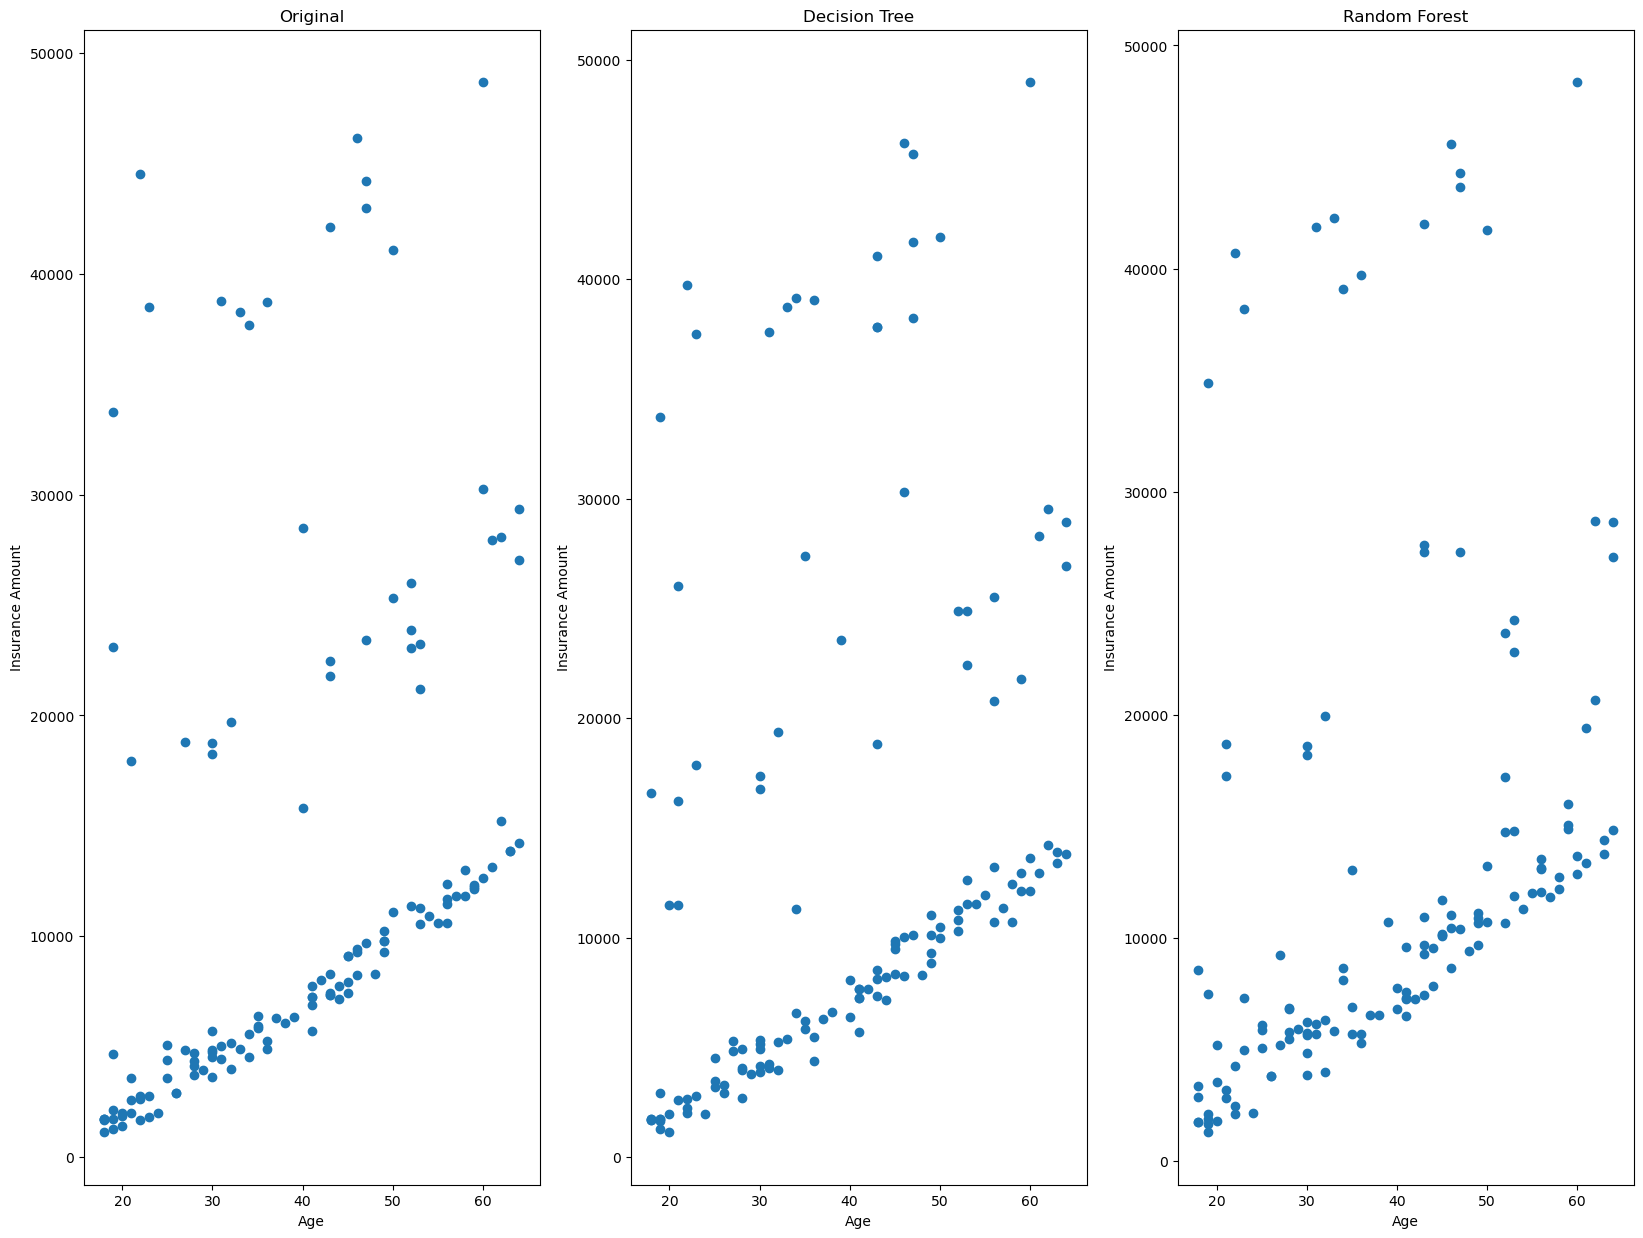

In [49]:
plt.figure(figsize=(20, 15))
plt.subplot(1, 3, 1)
plt.scatter(xtest['age'], ytest);
plt.xlabel("Age")
plt.ylabel("Insurance Amount")
plt.title("Original")
plt.subplot(1, 3, 2)
plt.scatter(xtest['age'], dt_ypred);
plt.xlabel("Age")
plt.ylabel("Insurance Amount")
plt.title("Decision Tree")
plt.subplot(1, 3, 3)
plt.scatter(xtest['age'], rf_ypred);
plt.xlabel("Age")
plt.ylabel("Insurance Amount")
plt.title("Random Forest")

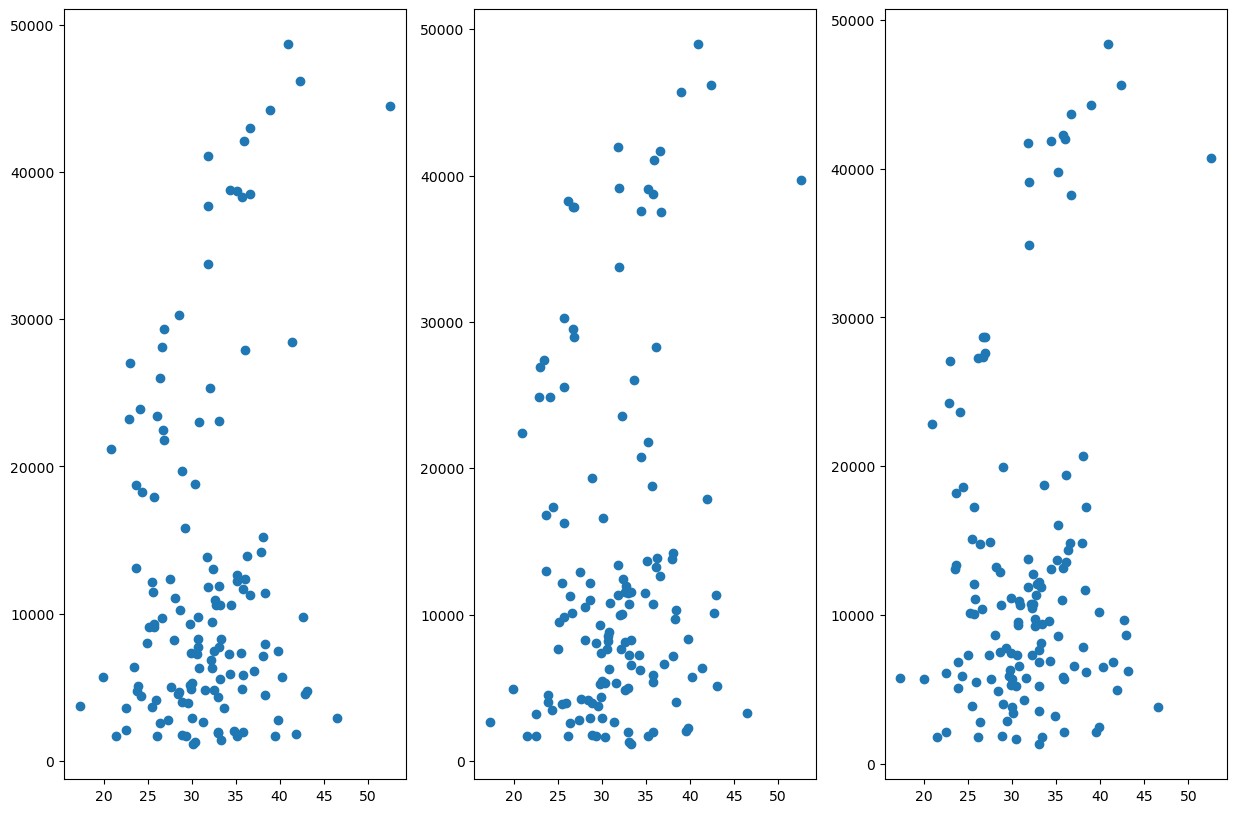

In [50]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.scatter(xtest['bmi'], ytest);
plt.subplot(1, 3, 2)
plt.scatter(xtest['bmi'], dt_ypred);
plt.subplot(1, 3, 3)
plt.scatter(xtest['bmi'], rf_ypred);